In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/gold_price.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [4]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


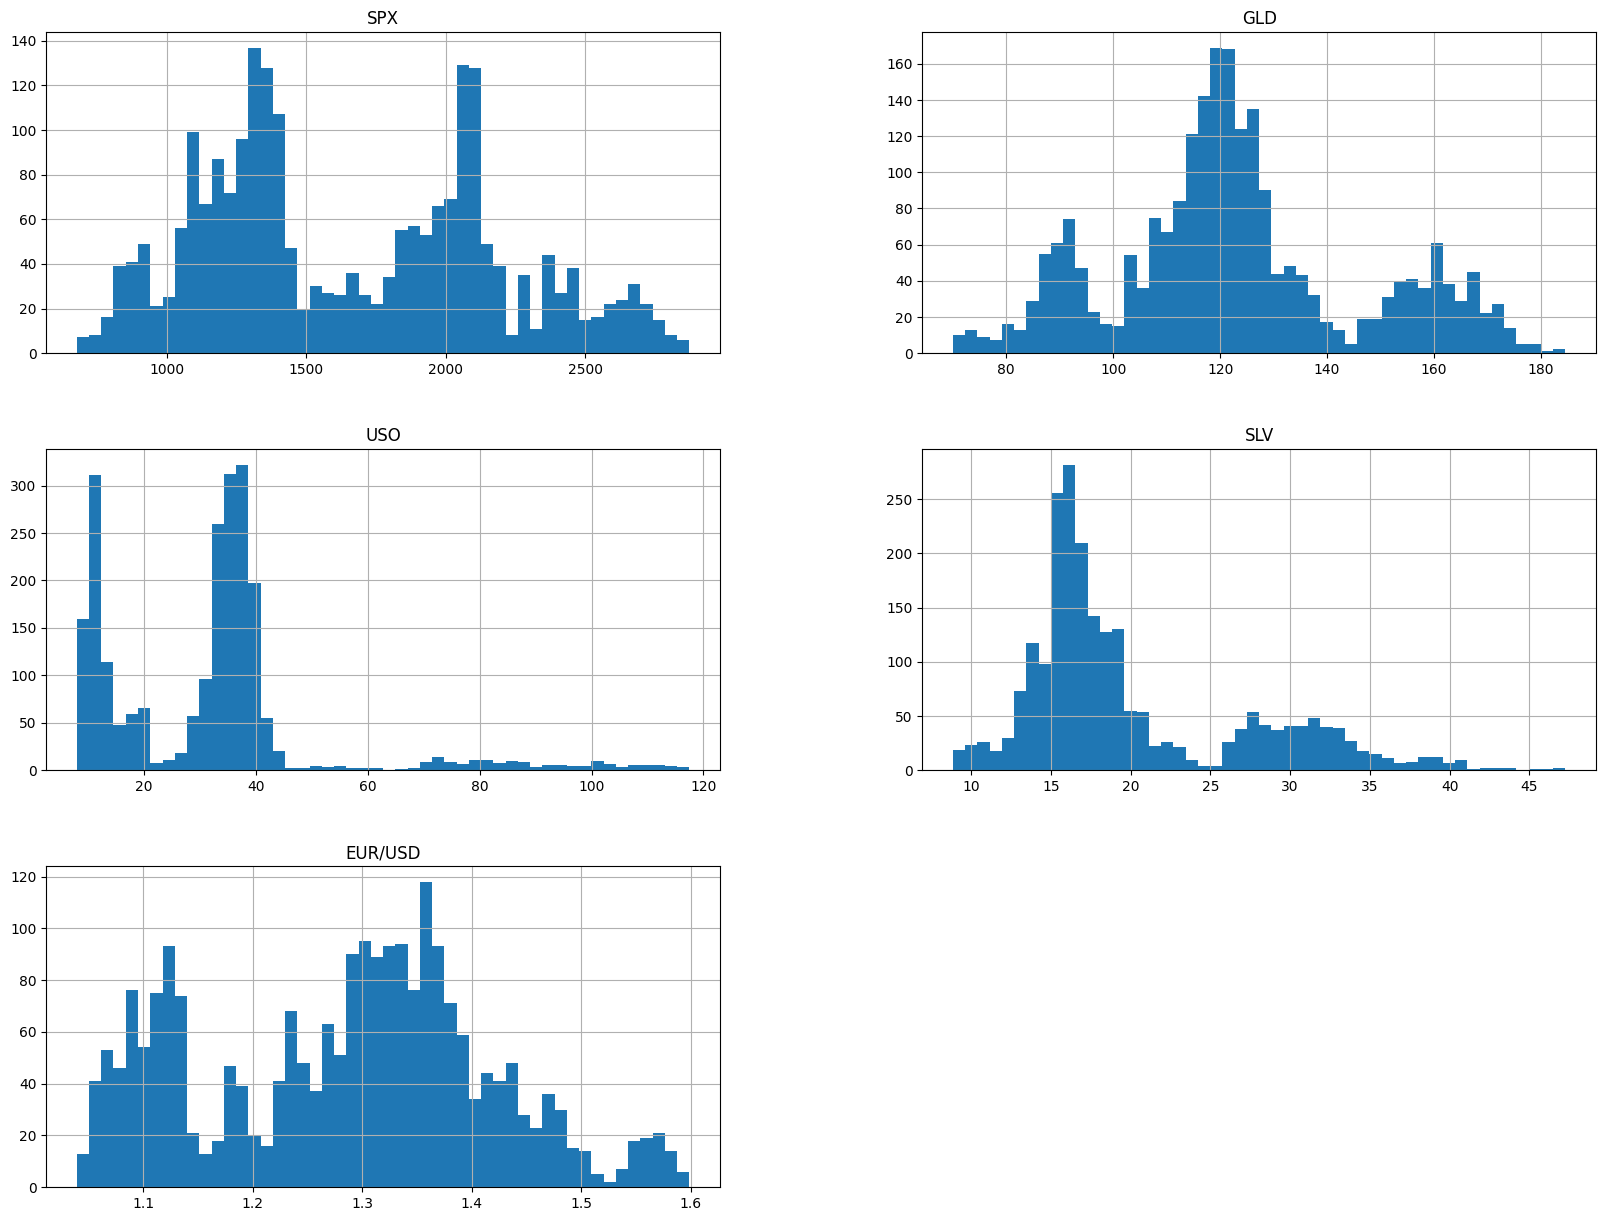

In [6]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
# Convert 'Date' to datetime and extract features
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek

# Drop the original 'Date' column
df.drop(columns=['Date'], inplace=True)

# Define features and target
X = df.drop(columns=['GLD'])  # Features
y = df['GLD']  # Target

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the best model
joblib.dump(scaler, 'slr.pkl')


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Define individual models
linear_model = LinearRegression()
random_forest_model = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42)
xgboost_model = XGBRegressor(n_estimators=50, max_depth=5, random_state=42)

# Train each model separately
linear_model.fit(X_train_scaled, y_train)
random_forest_model.fit(X_train_scaled, y_train)
xgboost_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test_scaled)
y_pred_rf = random_forest_model.predict(X_test_scaled)
y_pred_xgb = xgboost_model.predict(X_test_scaled)

# Evaluate models
results = {
    "Linear Regression": {
        "R² Score": r2_score(y_test, y_pred_linear),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_linear))
    },
    "Random Forest": {
        "R² Score": r2_score(y_test, y_pred_rf),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_rf))
    },
    "XGBoost": {
        "R² Score": r2_score(y_test, y_pred_xgb),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_xgb))
    }
}

# Display results
print(results)


{'Linear Regression': {'R² Score': 0.9173218724359385, 'RMSE': 6.732934628912751}, 'Random Forest': {'R² Score': 0.9949795346181234, 'RMSE': 1.6591324977458304}, 'XGBoost': {'R² Score': 0.9962578827198456, 'RMSE': 1.4324114333101334}}


In [11]:

# Save the trained model
best_model = linear_model
import joblib

# Save the best model
joblib.dump(best_model, 'GoldPrice_model.pkl')

print("Model saved successfully!")


Model saved successfully!
